### Various tests using various inbalanced-learn models

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from preprocessing import preprocess
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_file = "data/FRISS_ClaimHistory_training.csv"
test_file = "data/FRISS_ClaimHistory_test.csv"
fraud_file = "data/fraud_cases.csv"

train, test = preprocess(train_file, test_file, fraud_file)

Finished preprocessing.
Dropped 182 Train entries.
Dropped 43 Test entries.
Preprocessing took 1.81 seconds


In [3]:
drop_cols = ["sys_fraud", "sys_claimid", 'claim_amount_claimed_total']

X_train = train.drop(columns=drop_cols)
y_train = train["sys_fraud"]

X_test = test.drop(columns=drop_cols)
y_test = test["sys_fraud"]

In [4]:
def print_metrics(y, preds):
  print("- Accuracy: {0:.4f}".format(accuracy_score(preds, y)))
  print("- Balanced Accuracy: {0:.4f}".format(balanced_accuracy_score(y, preds)))
  print("- Precision: {0:.4f}".format(precision_score(preds, y)))
  print("- Recall: {0:.4f}".format(recall_score(preds, y)))
  print("- F1: {0:.4f}".format(f1_score(preds, y)))
  cm = confusion_matrix(y, preds)
  cmd_obj = ConfusionMatrixDisplay(cm) 
  cmd_obj.plot()

### Classifier including inner balancing samplers

- Accuracy: 0.9931
- Balanced Accuracy: 0.5000
- Precision: 0.0000
- Recall: 0.0000
- F1: 0.0000


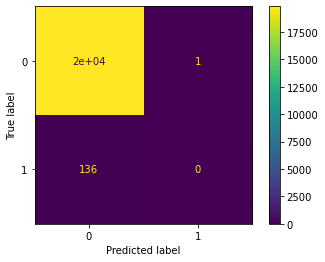

In [5]:
# Bagging Classifier
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0)
bc.fit(X_train, y_train) 

y_pred = bc.predict(X_test)
print_metrics(y_test, y_pred)


- Accuracy: 0.7504
- Balanced Accuracy: 0.5129
- Precision: 0.2721
- Recall: 0.0075
- F1: 0.0146


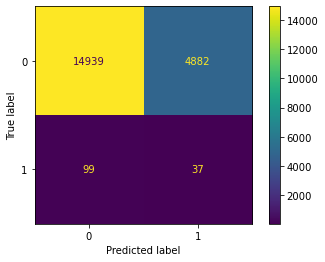

In [6]:
# Balanced Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train) 

y_pred = bbc.predict(X_test)
print_metrics(y_test, y_pred) 

- Accuracy: 0.5100
- Balanced Accuracy: 0.5306
- Precision: 0.5515
- Recall: 0.0077
- F1: 0.0151


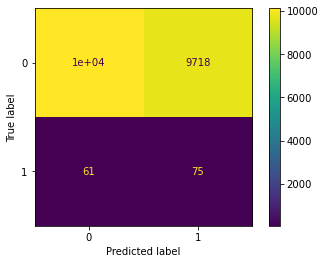

In [11]:
# Balanced RF Classifier

from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, criterion="entropy", random_state=10)
brf.fit(X_train, y_train) 

y_pred = brf.predict(X_test)

print_metrics(y_test, y_pred)  

/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


- Accuracy: 0.7444
- Balanced Accuracy: 0.5281
- Precision: 0.3088
- Recall: 0.0083
- F1: 0.0162


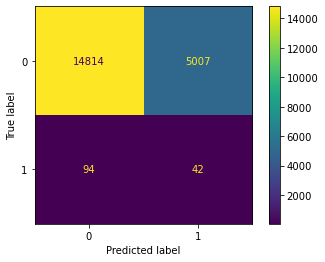

In [8]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)  

y_pred = rusboost.predict(X_test)
print_metrics(y_test, y_pred)  

- Accuracy: 0.6701
- Balanced Accuracy: 0.5637
- Precision: 0.4559
- Recall: 0.0094
- F1: 0.0185


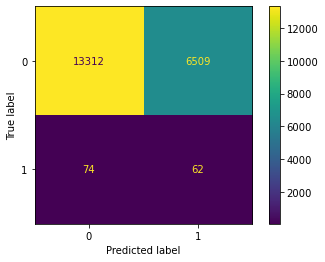

In [9]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train) 

y_pred = eec.predict(X_test)
print_metrics(y_test, y_pred)  